# Predicting Heart Diseases using Machine Learning

In this project, I have explored some foundation machine learning and data science concepts by exploring the heart disease classification.

## What is classification?

Classification involves deciding whether a sample is part of one class or another (single-class classification). If there are multiple class options, it's referred to as multi-class classification.

This heart disease classification project uses single-class classification.

**I've gone through the following topics and answered the questions:**

* Exploratory data analysis (EDA) - the process of going through a dataset and finding out more about it.
* Model training - create model(s) to learn to predict a target variable based on other variables.
* Model evaluation - evaluating a models predictions using problem-specific evaluation metrics.
* Model comparison - comparing several different models to find the best one.
* Model fine-tuning - once I've found a good model, how can it be improved?
* Feature importance - since I'am predicting the presence of heart disease, are there some things which are more important for prediction?
* Cross-validation - if I build a good model, can I be sure it will work on unseen data?
* Reporting what I've found - if I had to present our work, what would I show someone?

# Steps in designing machine learning model

## 1. Problem definition

In this case, I explored a binary classification problem, which means that a sample can only be one of two things.

This is because I used a number of differnet features about a person to predict whether they have heart disease or not.

`Given clinical parameters about a patient, can we predict whether or not they have heart disease?`

## 2. Data

The original data came from the Cleveland database from UCI Machine Learning Repository.

The original database contains 76 attributes, but here only 14 attributes has been used. Attributes (also called features) are the variables that I've used to predict my target variable.

Attributes and features are also referred to as independent variables and a target variable can be referred to as a dependent variable.

## 3. Evaluation

The evaluation metric is something you might define at the start of a project.

Since machine learning is very experimental, you might say something like:

**If I can reach 90% accuracy at predicting whether or not a patient has heart disease during the proof of concept, that will be acceptable result.**

The reason this is helpful is it provides a rough goal for a machine learning engineer or data scientist to work towards.

However, due to the nature of experimentation, the evaluation metric may change over time.

## 4. Features

Features are different parts of the data. During this step, I try to find out what I can about the data.

One of the most common ways to do this, is to create a data dictionary.

## Heart Disease Data Dictionary

#### A data dictionary describes the data you're dealing with. 

#### The following are the features we'll use to predict our target variable (heart disease or no heart disease).

1. age - age in years 
2. sex - (1 = male; 0 = female) 
3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl 
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved 
9. exang - exercise induced angina (1 = yes; 0 = no) 
10. oldpeak - ST depression induced by exercise relative to rest 
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy 
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising 
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

# All the tools and libraries I will use

### I will actually import all of these as I go along and when I need them, but here's the full list:

#### Exploratory data analysis tools and plotting libraries
* Numpy
* Pandas
* Matplotlib
* Seaborn

#### Models
* LogisticRegressionClassifier
* KNeighborsClassifier
* RandomForestClassifier

#### Model evaluators
* train_test_split, cross_val_score
* RandomizedSearchCV, GridSearchCV
* confusion_matrix, classification_report
* precision_score, recall_score, f1_score
* roc_curve

# Loading data

In [62]:
# Importing numpy and pandas
import numpy as np
import pandas as pd

In [63]:
# Using pandas read_csv to import dataset
heart_disease = pd.read_csv('heart-disease.csv')

# Previewing the dataset
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


**This is a dataset that contains medical information about patents and whether they have heart disease or not.**

In [64]:
# Checking the shape (rows, columns)
heart_disease.shape

(303, 14)

# 1. Exploratory Data Analysis (EDA)

In this step, I started to explore the data.

The goal here is to find out more about the data and become a subject matter expert on the dataset I am working with.

Some questions that should be answered in this step:

1. What questions am I trying to solve?
2. What kind of data do I have and how do I treat different types?
3. What's missing from the data and how do I deal with it?
4. Where are the outlier and why should I care about them?
* Outlier are values and samples which are obviously very different from the others. In may be incorrect sample, or it may actually be that it is just an outlandish example and should be included in dataset.
5. How can I add, change or remove features to get more out of my data?

In [65]:
# Checking the first 5 rows
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [66]:
# Checking the last 5 rows
heart_disease.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [67]:
# Isolating the target row
heart_disease['target']

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

Here it can be seen whether the specific patent has heart disease (1) or not (0).

In [68]:
# Counting the numbers of patents that have heart disease and the number of patents that don't have heart disease.
heart_disease['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

Here I can compare the number of patients that have heart disease vs the number of patents that don't have heart disease.

**From here we infer that this is a very balanced problem - meaning we have the similar amount of examples for both classes.**

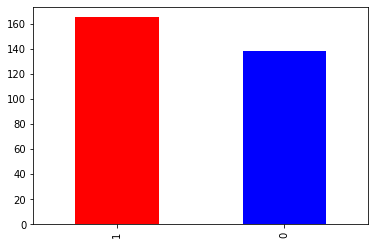

In [69]:
# Visualizing the number of patents using Pandas built-in visualization
heart_disease['target'].value_counts().plot(kind='bar', color=['red','blue']);

**Visualizing the number of patients that have heart disease vs those that don't have it.**

In [70]:
# Getting some basic information about my dataset, like type and memory usage
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [71]:
# Are there any missing values?
heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**Here it can be verified that there are no missing values.**

In [72]:
# Describe - getting some numerical information
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Comparing the features columns to the target variable

#### Frequency according to Sex/gender

In [73]:
heart_disease.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

So, here it can be seen that there are a lot more males than females patients.

* 1 - male
* 0 - female

In [74]:
# Compare target column to sex column with crosstab
pd.crosstab(heart_disease.target, heart_disease.sex)

sex,0,1
target,,
0,24,114
1,72,93


From this, we see:

* 72 out of 96 female patients have heart disease.

* 93 out of 207 male patients have heart disease.

What can we infer from this?

- If a participant is a woman, BASED ON EXISTING DATA, there is 0.75 chance she has heart disease.

- If a participant is a man, BASED ON EXISTING DATA, there is 0.449 chance he has heart disease.

- Not taking gender into consideration, there is 0.54 chance he/she has heart disease.

### The goal is to beat those chances with machine learning model.

In [75]:
# Importing matplotlib

import matplotlib.pyplot as plt
%matplotlib inline

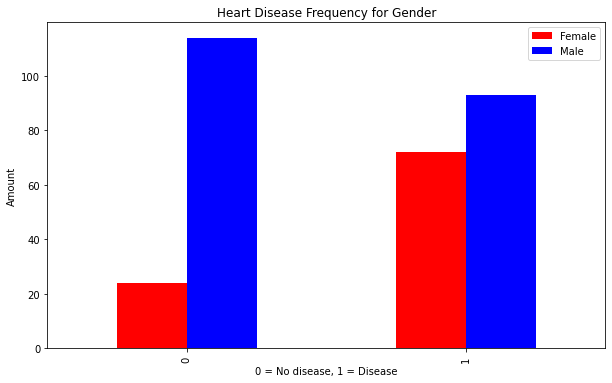

In [76]:
# Creating a plot of crosstab

pd.crosstab(heart_disease.target, heart_disease.sex).plot(kind='bar', figsize=(10,6), color=['red', 'blue'])

# Adding the title to make it more informative
plt.title('Heart Disease Frequency for Gender')

# Labeling X axis
plt.xlabel('0 = No disease, 1 = Disease')

# Labeling Y axis
plt.ylabel('Amount')

# Legend to make it more readable
plt.legend(['Female', 'Male'])

### Comparing age, thalach, and target

* thalach - maximum heart rate achieved

In [77]:
heart_disease['thalach'].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

From here we can infer: 

There are 91 different values in thalach column.

In [78]:
# Showing all age columns where target = 1
heart_disease.age[heart_disease.target==1]

0      63
1      37
2      41
3      56
4      57
       ..
160    56
161    55
162    41
163    38
164    38
Name: age, Length: 165, dtype: int64

### Plotting heart disease data on a scatter plot

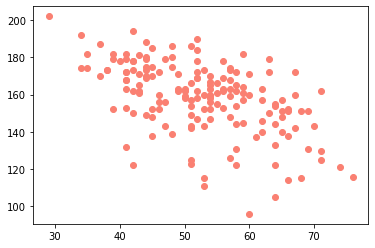

In [79]:
# Scatter with positive examples
plt.scatter(heart_disease.age[heart_disease.target==1], 
            heart_disease.thalach[heart_disease.target==1], 
            color='salmon')

These are patents with heart disease.

From this, it can be inferred that there is a downward trend. It seems, the younger someone is, the higher their heart rate.

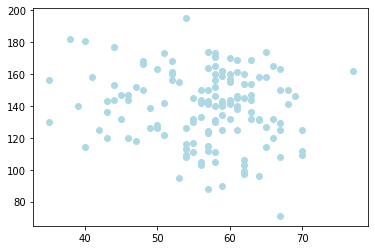

In [80]:
# Scatter with negative examples
plt.scatter(heart_disease.age[heart_disease.target==0], 
            heart_disease.thalach[heart_disease.target==0],
            color='lightblue')

These are the patents without heart disease.

#### Both plots together, for comparison

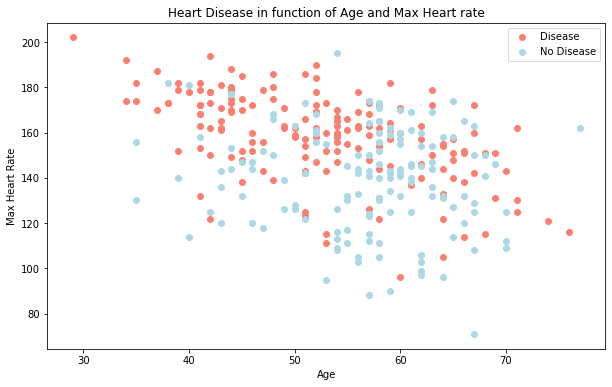

In [81]:
# Adjusting the size of a plot
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(heart_disease.age[heart_disease.target==1], 
            heart_disease.thalach[heart_disease.target==1], 
            color='salmon')

# Scatter with negative examples
plt.scatter(heart_disease.age[heart_disease.target==0], 
            heart_disease.thalach[heart_disease.target==0],
            color='lightblue')

# Adding some helpful information
plt.title('Heart Disease in function of Age and Max Heart rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease', 'No Disease'])

This is where machine learning model excels. Humans can't make much of this information.

#### What is the distribution of the age?

Distribution is spread of the data. We will use histogram to visualize that.

<AxesSubplot:ylabel='Frequency'>

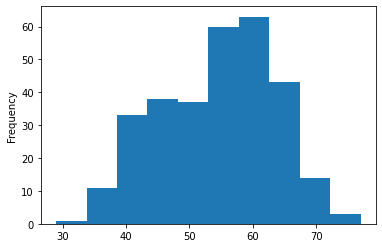

In [82]:
# Perfect Normal Distribution
heart_disease.age.plot.hist()

### Heart disease frequency per chest pain type

3.cp - chest pain type

* 0: Typical angina: chest pain related decrease blood supply to the heart
* 1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease

In [83]:
pd.crosstab(heart_disease.cp, heart_disease.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


**It seems that as chest pain goes up, so does the probability of heart disease.** 

Here, we see a strange thing: chest pain type 2 (non heart related), seems to show that more patents have heart disease with non heart related type pain. This is the kind of things you would want to discuss with medical expert. 

### Visualizing chest pain type heart disease frequency

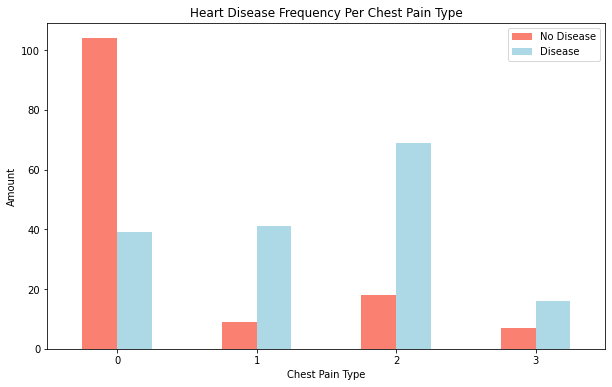

In [84]:
pd.crosstab(heart_disease.cp, heart_disease.target).plot(kind='bar', # bar kind plot
                                                         figsize=(10,6), # adjusting the size of the plot
                                                         color=['salmon','lightblue']) # colors

# Add some comunication
plt.title('Heart Disease Frequency Per Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount')
plt.legend(['No Disease', 'Disease'])
plt.xticks(rotation=0);

In [85]:
# Quickly checking the dataframe again
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Building a Correlation Matrix

Correlation matrix is a big table of numbers telling us how each independent variable is related to each other.

Are they a possitive correlation or a negative correlation?

In [86]:
# using corr method
heart_disease.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


### Making our correlation matrix visual

In [87]:
# Importing seaborn
import seaborn as sns

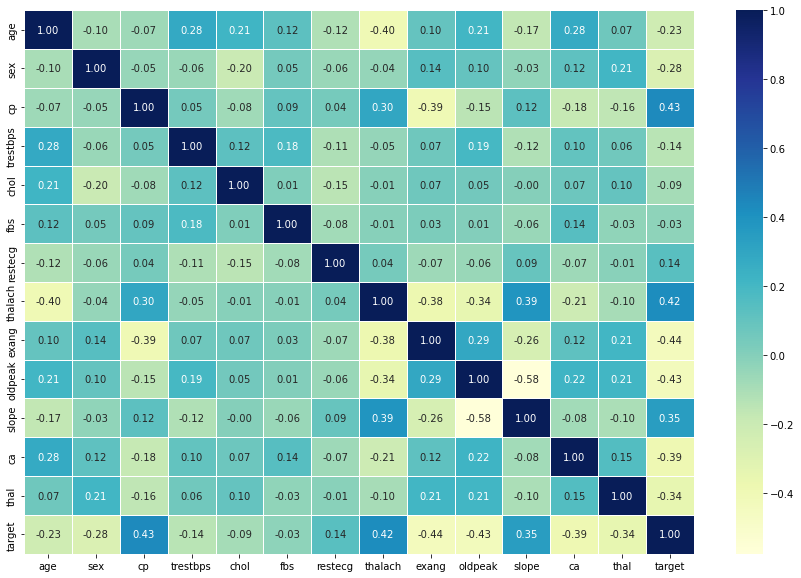

In [88]:
# making corr_matrix variable that will store correletion matrix
corr_matrix = heart_disease.corr()

# making fig and ax variables that will take some plot parameters
fig, ax = plt.subplots(figsize=(15,10))

# using seaborn's heatmap to visualize
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt='.2f',
                cmap='YlGnBu') #Yl - yellow, Gn - green, Bu - blue

This tells us how each thing is related to other. Higher positive number means a potential positive correlation. Higher negative number means a potential negative correlation.

Positive correlation example: as cp goes up the target value also increases. That's a positive correlation.

Negative correlation = a relationship between two variables in which one variable increases as the other decreases.

The diagonal, which is 1, is giving the perfect correlation, which of course means that the row and the column are exactly equal, because they are the same thing.

# 2. Machine Learning Part

In [89]:
# reviewing the dataset
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## 2.1. Splitting the data into features (X) and label (y)

In [90]:
# X will be equal to every column except target column
X = heart_disease.drop('target', axis=1)

# y will be equal to only the target column
y = heart_disease['target']

In [91]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [92]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

## 2.2. Splitting the data into train set and test set

In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [94]:
# Looking at the train data
X_train

# 242 rows out of 303

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
244,56,1,0,132,184,0,0,105,1,2.1,1,1,1
26,59,1,2,150,212,1,1,157,0,1.6,2,0,2
190,51,0,0,130,305,0,1,142,1,1.2,1,0,3
181,65,0,0,150,225,0,0,114,0,1.0,1,3,3
213,61,0,0,145,307,0,0,146,1,1.0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,52,1,0,125,212,0,1,168,0,1.0,2,2,3
183,58,1,2,112,230,0,0,165,0,2.5,1,1,3
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2
36,54,0,2,135,304,1,1,170,0,0.0,2,0,2


In [95]:
# looking at the test data
y_train

# also 242 rows, like X_train

244    0
26     1
190    0
181    0
213    0
      ..
275    0
183    0
58     1
36     1
130    1
Name: target, Length: 242, dtype: int64

Now that we've got our data split into train and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

We'll test it (use the patterns) on the test data set.

**Insert scikit-learn model choosing picture**

## 3. Choosing the Right Model

I tried 3 different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbours classifier
3. Random Forest Classifier

In [96]:
# Importing
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

### 3.1. Logistic Regression

In [97]:
# Instantiating the model
lr = LogisticRegression(max_iter=1000)

# Fitting the model
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [98]:
# Score of the Logistic Regression model on test data
lr.score(X_test, y_test)

0.8032786885245902

### 3.2. K-Nearest Neighbours Classifier

In [99]:
# Instantiating the model
knn = KNeighborsClassifier()

# Fitting the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [100]:
# Score of the KNN model on test data
knn.score(X_test, y_test)

0.5737704918032787

### 3.3. Random Forest Classifier

In [101]:
# Insantiating and fitting the model

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [102]:
# Score of the Random Forest model on test data
rfc.score(X_test, y_test)

0.8360655737704918

## 4. Model Comparison

In [103]:
lr_score = lr.score(X_test, y_test)
knn_score = knn.score(X_test, y_test)
rfc_score = rfc.score(X_test, y_test)

model_scores = [lr_score, knn_score, rfc_score]

model_scores

[0.8032786885245902, 0.5737704918032787, 0.8360655737704918]

The best algorithm for predicting heart disease is Random Forest, so we'll use that one.

But, it is still not near the goal accuracy, which is 90%.

## 5. Tuning/Improving the Model

Now we've got a baseline model, and we know the model's first predictions aren't always what we should base our next steps off. What should we do next? These are some things you should pay attention when you are working on a classification model. Actually, the first 2 will be used with almost any Machine Learning model. But others are specific to classification.

* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve

### Hyperparameter Tuning

### 5.1. KNN Tuning

Here we compared different versions of the same model, and compared their scores on different datasets.


In [104]:
# Making empty lists for train and test scores 
train_scores = []
test_scores = []

# I want to try different values from 1 to 20, for example
neighbors = range(1, 21)

knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    # fitting the algorithm
    knn.fit(X_train, y_train)
    
    # Update training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [105]:
train_scores

[1.0,
 0.8140495867768595,
 0.7892561983471075,
 0.7851239669421488,
 0.7892561983471075,
 0.7851239669421488,
 0.7644628099173554,
 0.756198347107438,
 0.7231404958677686,
 0.743801652892562,
 0.7148760330578512,
 0.7107438016528925,
 0.7148760330578512,
 0.7148760330578512,
 0.7272727272727273,
 0.7148760330578512,
 0.6983471074380165,
 0.6900826446280992,
 0.7066115702479339,
 0.6942148760330579]

In [106]:
test_scores

[0.6229508196721312,
 0.6229508196721312,
 0.6065573770491803,
 0.5901639344262295,
 0.5737704918032787,
 0.5737704918032787,
 0.5901639344262295,
 0.6229508196721312,
 0.5573770491803278,
 0.5901639344262295,
 0.5573770491803278,
 0.5737704918032787,
 0.5901639344262295,
 0.6229508196721312,
 0.6065573770491803,
 0.639344262295082,
 0.6065573770491803,
 0.6229508196721312,
 0.6229508196721312,
 0.6065573770491803]

Maximum KNN score on the test data: 63.93%


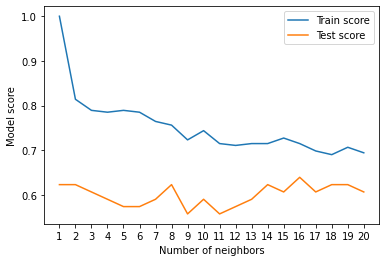

In [107]:
# These are probabily best visualized

plt.plot(neighbors, train_scores, label='Train score')
plt.plot(neighbors, test_scores, label='Test score')

plt.xticks(np.arange(1, 21, 1))

plt.xlabel('Number of neighbors')
plt.ylabel('Model score')

plt.legend()

print(f'Maximum KNN score on the test data: {max(test_scores)*100:.2f}%')

Here we see that KNN, even with hyperparameters tuning, hasn't reached the score of logistic regression.

**So, that means that I will have to discard KNN model**

### Hyperparameter tuning with RandomizedSearchCV

I'm going to tune:

* LogisticRegression()
* RandomForestClassifier()

... using RandomizedSearchCV

In [108]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [109]:
# Creating a hyperparameter grid for logistic Regression

log_reg_grid = {'C': np.logspace(-4, 4, 20), 
                'solver': ['liblinear']}

In [110]:
np.logspace(-4,4,20)

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

In [111]:
# Create a hyperparameter grid for RandomForestClassifier

rf_grid = {'n_estimators': np.arange(10, 1000, 50), 
           'max_depth': [None,3,5,10],
          'min_samples_split': np.arange(2,20,2),
          'min_samples_leaf': np.arange(1,20,2)}

Now we've got hyperparameters grids setup for each of oud models.

Let's tune them using RandomizedSearchCV

### 5.2. Tune LogisticRegression

In [112]:
# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20, 
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [113]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [114]:
rs_log_reg.score(X_test, y_test), lr_score

(0.8360655737704918, 0.8032786885245902)

We can see that we have successfuly tuned our model, and got approx 0.03% better performance.

### 5.3. Tune RandomForestClassifer

In [115]:
# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions=rf_grid,
                                cv=5,
                                n_iter=20, 
                                verbose=True)

# Fit random hyperparameter search model for RandomForestClassifer
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [116]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 710,
 'min_samples_split': 6,
 'min_samples_leaf': 9,
 'max_depth': 3}

In [117]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test), rfc_score

(0.8524590163934426, 0.8360655737704918)

I improved the model a little

### Hyperparameter Tuning with GridSearchCV

Since our LogisticRegression model provides the best score so far, we'll try to improve them again using GridSearchCV.

In [118]:
# Different hyperparameters for our LogisticRegression model

log_reg_grid = {'C': np.logspace(-4,4,30), 
                'solver': ['liblinear']}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(), 
                          param_grid=log_reg_grid, 
                          cv=5, 
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [119]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [120]:
# Evaluating the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.8360655737704918

## 6. Evaluating our model

Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [121]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [122]:
y_preds

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0], dtype=int64)

In [123]:
y_test

237    0
110    1
167    0
117    1
271    0
      ..
279    0
64     1
136    1
33     1
158    1
Name: target, Length: 61, dtype: int64

In [124]:
from sklearn.metrics import plot_roc_curve

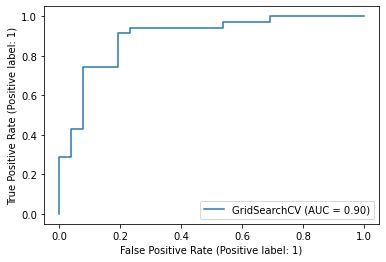

In [125]:
# Plotting ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test)

In [126]:
from sklearn.metrics import confusion_matrix

In [127]:
# Confusion matrix

print(confusion_matrix(y_test, y_preds))

[[21  5]
 [ 5 30]]


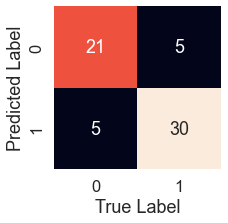

In [128]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    '''
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    '''
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), 
                     annot=True, 
                     cbar=False)
    
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')

plot_conf_mat(y_test, y_preds)

Now we've got a ROC curve, an AUC metric, and a confusion matrix. Let's get a classification report as well as cross-validated precision, recall and f1-score.

### Classification report

In [129]:
from sklearn.metrics import classification_report

In [130]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        26
           1       0.86      0.86      0.86        35

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



These classifications are only calculated using one split, and we want more.

### Calculate evaluation metrics using cross-validation

We're going to calculate accuracy, precision, recall, and f1-score of out model using cross-validation and to do so we'll be using `cross_val_score`

In [131]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [132]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [133]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=2.592943797404667, 
                         solver='liblinear')

In [134]:
# Cross-validated Accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='accuracy')

cv_acc

array([0.81967213, 0.86885246, 0.85245902, 0.86666667, 0.71666667])

In [135]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8248633879781421

In [136]:
# Cross-validated Precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='precision')

cv_precision

array([0.78947368, 0.90322581, 0.85294118, 0.83783784, 0.71052632])

In [137]:
cv_precision = np.mean(cv_precision)
cv_precision

0.8188009641520078

In [138]:
# Cross-validated Recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='recall')

cv_recall

array([0.90909091, 0.84848485, 0.87878788, 0.93939394, 0.81818182])

In [139]:
cv_recall = np.mean(cv_recall)
cv_recall

0.8787878787878787

In [140]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='f1')

cv_f1

array([0.84507042, 0.875     , 0.86567164, 0.88571429, 0.76056338])

In [141]:
cv_f1 = np.mean(cv_f1)
cv_f1

0.8464039460644465

<AxesSubplot:title={'center':'Cross-validated classification'}>

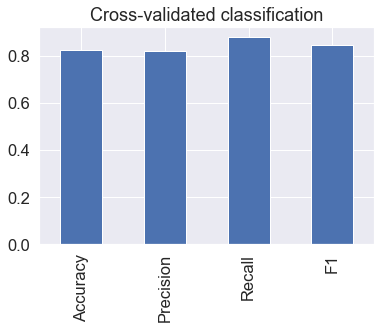

In [142]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({'Accuracy': cv_acc, 
                           'Precision': cv_precision, 
                           'Recall': cv_recall, 
                           'F1': cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title='Cross-validated classification', legend=False)

### Feature Importance

Feature importance is another thing as asking, 'which features contributed most to the outcomes of the model and how did they contribute?'

Finding feature importance is different for each machine learning model.

In [143]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Feature Importance for LogisticRegressionModel

In [144]:
# Fit an instance of LogisticRegression
gs_log_reg.best_params_


{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [145]:
clf = LogisticRegression(C=2.592943797404667, 
                         solver='liblinear')

clf.fit(X_train, y_train)

LogisticRegression(C=2.592943797404667, solver='liblinear')

In [146]:
# Check coef_
clf.coef_

array([[ 0.01697939, -1.65760578,  0.9122144 , -0.02203116, -0.00560244,
         0.25276711,  0.33749049,  0.03076447, -0.78000308, -0.44072235,
         0.7658675 , -0.96896672, -0.75269743]])

In [147]:
# Match coef's of features to columns
feature_dict = dict(zip(heart_disease.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.016979394220987265,
 'sex': -1.657605779144783,
 'cp': 0.9122143981196156,
 'trestbps': -0.022031164425703766,
 'chol': -0.005602443435526098,
 'fbs': 0.252767111036245,
 'restecg': 0.337490485409081,
 'thalach': 0.030764469251360636,
 'exang': -0.7800030826583845,
 'oldpeak': -0.44072234955981626,
 'slope': 0.7658674964282508,
 'ca': -0.9689667156133747,
 'thal': -0.7526974308414148}

#### Visualize feature importance

<AxesSubplot:title={'center':'Feature Importance'}>

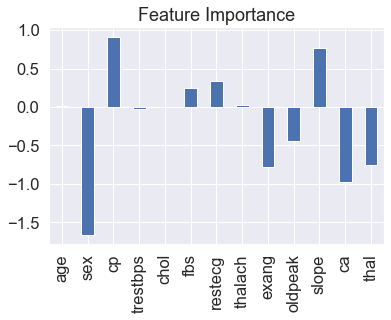

In [148]:
feature_heart_disease = pd.DataFrame(feature_dict, index=[0])
feature_heart_disease.T.plot.bar(title='Feature Importance', legend = False)

Showing which features are helping predict heart disease and how much

In [149]:
# Comparing only 2 features 
pd.crosstab(heart_disease['sex'], heart_disease['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [150]:
pd.crosstab(heart_disease['slope'], heart_disease['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## If I haven't hit wanted evaluation metric yet, I can ask myself:

* Could you collect more data?
* Could you try a better model? Like CatBoost or XGBoost?
* Could you improve the current models?